#### Importing useful libraries and modules

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
from datetime import datetime
import random
%matplotlib inline

#### Importing dataset

In [116]:
data= pd.read_csv("titles.csv")
data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [100]:
data.shape

(5806, 15)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [102]:
data.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


In [103]:
data.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

In [104]:
data.duplicated().sum()

0

* So, the dataset contains 5806 rows and 15 columns(featues)   
* Useful columns include= [type, release_year, age_certification, runtime, genres, production_countries, imbd_score, imdb_votes, tmdb_popularity, tmdb_score]  
* Columns that are not much useful are= [id, title, description, season, imbd_id]

### 1. Analyzing type of Show

In [32]:
types=data.groupby("type").size()
types

type
MOVIE    3759
SHOW     2047
dtype: int64

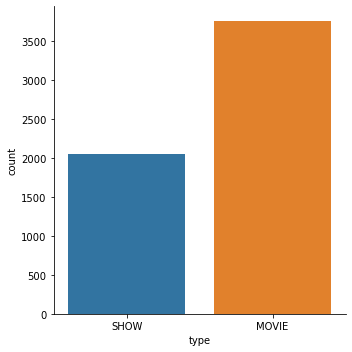

In [33]:
sns.catplot(x="type",kind="count",data=data)

Result:- Out of the total, there are 3759 Movies and 2047 Shows

#### Dividing the dataset as per "type" and checking for null values

In [106]:
shows= data[data.type=="SHOW"]
movies= data[data.type=="MOVIE"]

In [107]:
shows.isnull().sum()

id                        0
title                     0
type                      0
description              10
release_year              0
age_certification       257
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_id                 136
imdb_score              171
imdb_votes              171
tmdb_popularity          33
tmdb_score              132
dtype: int64

In [108]:
movies.isnull().sum()

id                         0
title                      1
type                       0
description                8
release_year               0
age_certification       2353
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  308
imdb_score               352
imdb_votes               368
tmdb_popularity           61
tmdb_score               186
dtype: int64

### 2. Analyzing age_certification

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'TV-MA'),
  Text(1, 0, 'R'),
  Text(2, 0, 'PG'),
  Text(3, 0, 'TV-14'),
  Text(4, 0, 'G'),
  Text(5, 0, 'PG-13'),
  Text(6, 0, 'TV-PG'),
  Text(7, 0, 'TV-Y'),
  Text(8, 0, 'TV-G'),
  Text(9, 0, 'TV-Y7'),
  Text(10, 0, 'NC-17')])

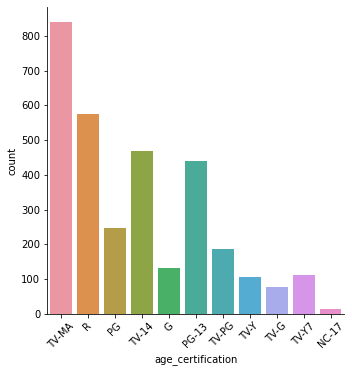

In [37]:
sns.catplot(x="age_certification",kind="count",data=data)
plt.xticks(rotation=45)

Result:- Total 11 types of certifications are there for shows and movies out of which TV-MA has the most counts.
* TV-MA: these programs are intended to be viewed by mature, adult audiences and may be unsuitable for children under 17.
* R: Under 17 requires accompanying parent or adult guardian.
* PG: Parental guidance suggested – Some material may not be suitable for children.
* TV-14: these shows may be unsuitable for children under 14.
* G: Appropriate for people of all ages.
* PG-13: Parents strongly cautioned – Some material may be inappropriate for children under 13.
* TV-PG: Programs contain material that parents or adult guardians may find unsuitable for children under the age of 14.

C:\Users\harsh\AppData\Local\Temp/ipykernel_18864/293430073.py:7: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



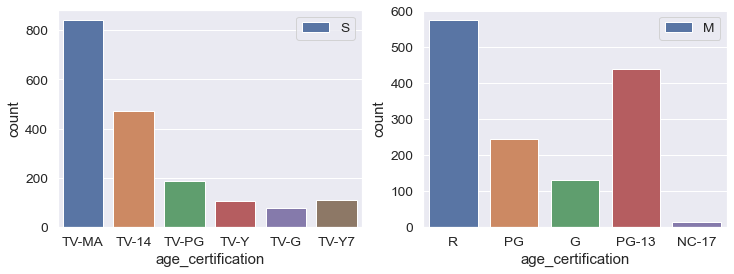

In [111]:
fig,ax= plt.subplots(1,2) #1 row 2 columns
fig.set_size_inches(12,4)
sns.countplot(x="age_certification",data=shows,ax=ax[0])
sns.countplot(x="age_certification",data=movies,ax=ax[1])
ax[0].legend("S")
ax[1].legend("M")
fig.show()

Result:- Most of the TV shows are rated TV-MA whereas most of the movies are rated as R

### 3&4. Analyzing Genres and Production countries
##### The genres and production_countries in the dataframe has array bound values. Therefore, unpacking and repairaing the production_countries and genre columns values which are currently arrays.

In [117]:
import ast
def repair_array_bound_categories(arr):
    arr= ast.literal_eval(arr)
    
    if len(arr) == 0:
        return np.nan
    elif len(arr) == 1:
        return arr[0]
    else:
        return random.choice(arr)

In [118]:
data["production_countries"]=data["production_countries"].apply(repair_array_bound_categories)
data["genres"]=data["genres"].apply(repair_array_bound_categories)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'documentation'),
  Text(1, 0, 'crime'),
  Text(2, 0, 'fantasy'),
  Text(3, 0, 'comedy'),
  Text(4, 0, 'horror'),
  Text(5, 0, 'family'),
  Text(6, 0, 'drama'),
  Text(7, 0, 'action'),
  Text(8, 0, 'war'),
  Text(9, 0, 'western'),
  Text(10, 0, 'romance'),
  Text(11, 0, 'thriller'),
  Text(12, 0, 'european'),
  Text(13, 0, 'scifi'),
  Text(14, 0, 'reality'),
  Text(15, 0, 'animation'),
  Text(16, 0, 'sport'),
  Text(17, 0, 'music'),
  Text(18, 0, 'history')])

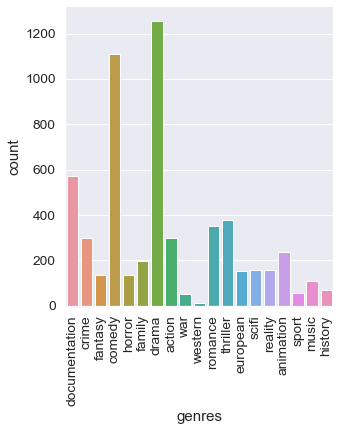

In [119]:
sns.catplot(x="genres",kind="count",data=data)
plt.xticks(rotation=90)

Result:- Dramas are the most popular genres on netflix. Comedy shows and movies are on second position, followed by documentation is on third.

#### Now, let's look at the production countries.

In [42]:
countries= data.production_countries.value_counts()
countries= pd.DataFrame(countries)
countries

,production_countries
US,2107
IN,618
GB,287
JP,280
KR,213
...,...
BY,1
Lebanon,1
SU,1
BF,1


#### A total of 94 countries have their content on Netflix. Let's pick the top 15 contributing countries and perform our analysis.

In [121]:
countries.head(15)

,production_countries,Release_year
US,2107,NaN
IN,618,NaN
GB,287,NaN
JP,280,NaN
KR,213,NaN
ES,177,NaN
FR,174,NaN
CA,155,NaN
MX,108,NaN
DE,94,NaN


In [122]:
labels= ["US","IN","GB","JP","KR","ES","FR","CA","MX","DE","BR","PH","TR","CN","AU"]
values= [2136,624,284,275,212,181,170,143,104,96,91,82,79,77,75]

In [123]:
import plotly.express as px
fig=px.pie(data,values=values, names=labels,title="Most Popular Production Countires")
fig.show()

Result:- The top three producers are:
* US(United states of America) having 46.1% content
* IN(India) having 13.5% of total content and,
* GB(United Kingdom) having 5.94% content.

### 5. Analyzing Release year

In [125]:
release_count= data.release_year.value_counts()
release_count= pd.DataFrame(release_count)
release_count

,release_year
2019,848
2020,805
2018,774
2021,758
2017,580
...,...
1974,1
1959,1
1962,1
1978,1


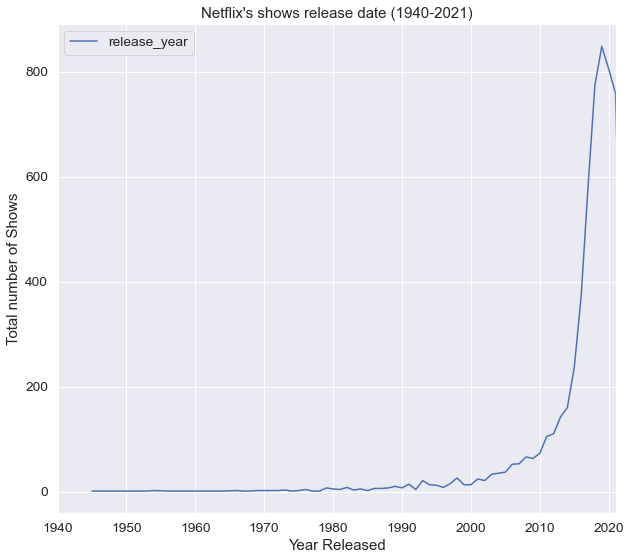

In [126]:
plt.figure(figsize=(10,9))
sns.lineplot(data=release_count)
plt.title("Netflix's shows release date (1940-2021)")
plt.xlim(1940,2021)
plt.xlabel("Year Released")
plt.ylabel("Total number of Shows")
plt.show()

Result:- Most of the releases are from 2010-2020.

In [127]:
shows_per_year= shows.release_year.value_counts()
movies_per_year= movies.release_year.value_counts()

In [128]:
print(shows_per_year.head())
print("\n")
print(movies_per_year.head())

2019    308
2020    306
2021    303
2018    301
2017    183
Name: release_year, dtype: int64


2019    540
2020    499
2018    473
2021    455
2017    397
Name: release_year, dtype: int64


Result:- Most of the shows were released in year 2019 having 848 counts. Out of 848, 308 were TV Shows and 540 were movies.

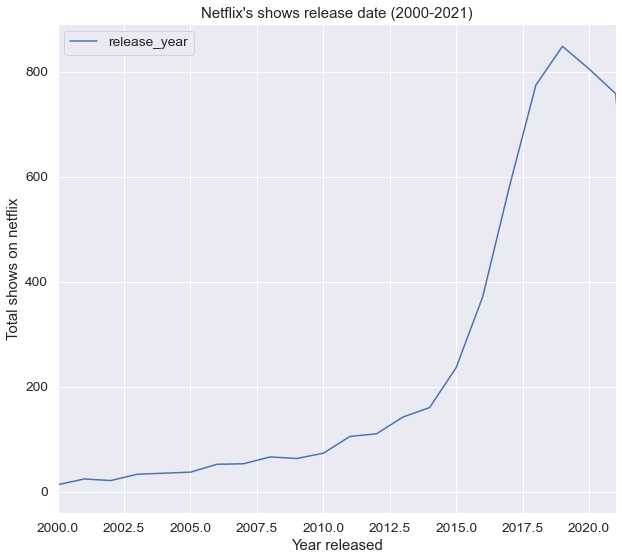

In [133]:
plt.figure(figsize=(10,9))
sns.lineplot(data= release_count)
plt.title("Netflix's shows release date (2000-2021)")
plt.xlim(2000,2021)
plt.xlabel("Year released")
plt.ylabel("Total shows on netflix")
plt.show()

Result:- We can clearly see that the peak is in the year 2019 but after 2019 there is a decline in the graph.

### 6. Analyzing Runtime

In [136]:
shows_runtime_max= max(shows.runtime)
shows_runtime_min= min(shows[shows.runtime >0].runtime) #ignoring 0 runtime as minimum as it may be due to some error.

movies_runtime_max= max(movies.runtime)
movies_runtime_min= min(movies[movies.runtime >0].runtime)

shows_avg= statistics.mean(shows.runtime)
movies_avg= statistics.mean(movies.runtime)

In [137]:
print(f"The average duration for a show on netflix is {int(shows_avg)} minutes, \nThe maximum duration is {shows_runtime_max} minutes and, \nThe minimum duration is {shows_runtime_min} minutes.")
print("\n")
print(f"The average duration for a movie on netflix is {int(movies_avg)} minutes, \nThe maximum duration is {movies_runtime_max} minutes and, \nThe minimum duration is {movies_runtime_min} minutes.")

The average duration for a show on netflix is 38 minutes, 
The maximum duration is 225 minutes and, 
The minimum duration is 2 minutes.


The average duration for a movie on netflix is 98 minutes, 
The maximum duration is 251 minutes and, 
The minimum duration is 3 minutes.


### 7. Analyzing Popularity and ratings

* The Internet Movie Database (IMDb) is an online database containing information and statistics about movies, TV shows and video games as well as actors, directors and other film industry professionals   
* The Movie Database (TMDB) is a community built movie and TV database. TMDb's strong international focus and breadth of data is largely unmatched and something they are incredibly proud of.

>Only IMDb registered users can cast a vote (from 1 to 10) on every released title in the database. Individual votes are then aggregated and summarized as a single IMDb rating, visible on the title's main page whereas, TMDB live and breathe community and that's precisely what makes it different.

#### First cleaning (dropping the null values) the imdb_score, imdb_votes, tmdb_popularity and tmdb_score

In [139]:
data_clean= data.dropna(subset=["imdb_score","imdb_votes","tmdb_popularity","tmdb_score"])
data_clean.isnull().sum()

id                         0
title                      0
type                       0
description                2
release_year               0
age_certification       2141
runtime                    0
genres                     3
production_countries      98
seasons                 3255
imdb_id                    0
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
dtype: int64

In [140]:
print(data.shape)
print(data_clean.shape)

(5806, 15)
(5041, 15)


#### Analyzing the correlation among different features.

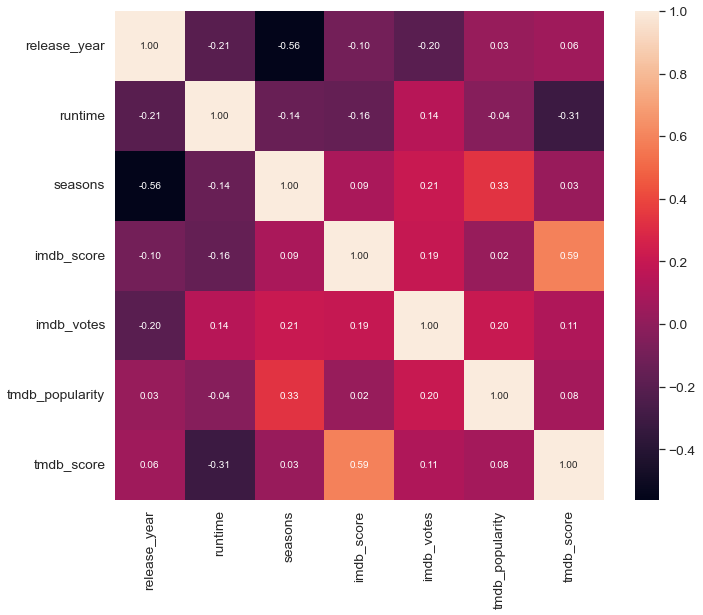

In [142]:
corrmat_data= data_clean.corr()

sns.set(font_scale=1.25)

fig,ax= plt.subplots(figsize=(11,9))

hm_data= sns.heatmap(corrmat_data, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size":10}, yticklabels= corrmat_data.index, xticklabels=corrmat_data.index)

plt.show()

Result:-
* The two ratings IMDb and TMDb scores have a normal correlation which doesn't give any conclusive statement.
* As highly popular shows and movies should have more number of seasons but here we can see that there is very small correlation between seasons and tmdb popularity.
* Same goes for release year and runtime, they doesn't affect much the popularity and score ratings.